## Import the necessary packages

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Load the File

In [17]:
file_path = './creditcard.csv'
df = pd.read_csv(file_path)

# Data Preprocessing

## Display the first few rows of the DataFrame

In [18]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [19]:
df.shape

(59511, 31)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59511 entries, 0 to 59510
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    59511 non-null  int64  
 1   V1      59511 non-null  float64
 2   V2      59511 non-null  float64
 3   V3      59511 non-null  float64
 4   V4      59511 non-null  float64
 5   V5      59511 non-null  float64
 6   V6      59511 non-null  float64
 7   V7      59511 non-null  float64
 8   V8      59511 non-null  float64
 9   V9      59511 non-null  float64
 10  V10     59511 non-null  float64
 11  V11     59511 non-null  float64
 12  V12     59511 non-null  float64
 13  V13     59511 non-null  float64
 14  V14     59511 non-null  float64
 15  V15     59511 non-null  float64
 16  V16     59510 non-null  float64
 17  V17     59510 non-null  float64
 18  V18     59510 non-null  float64
 19  V19     59510 non-null  float64
 20  V20     59510 non-null  float64
 21  V21     59510 non-null  float64
 22

In [21]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,59511.000000,59511.000000,59511.000000,59511.000000,59511.000000,59511.000000,59511.000000,59511.000000,59511.000000,59511.000000,...,59510.000000,59510.000000,59510.000000,59510.000000,59510.000000,59510.000000,59510.000000,59510.000000,59510.000000,59510.000000
mean,31748.304398,-0.238817,-0.010192,0.688628,0.171355,-0.259802,0.102828,-0.114713,0.055186,0.063558,...,-0.027845,-0.107505,-0.039753,0.006762,0.136147,0.020146,0.002969,0.004292,95.417957,0.002722
std,13666.604320,1.866654,1.658360,1.446481,1.386071,1.394132,1.308181,1.251962,1.191471,1.183014,...,0.723975,0.637525,0.594265,0.596854,0.438683,0.498979,0.384503,0.325266,270.114653,0.052104
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-9.283925,...,-20.262054,-10.933144,-26.751119,-2.836627,-7.495741,-2.534330,-8.567638,-9.617915,0.000000,0.000000
25%,26157.000000,-0.993866,-0.581502,0.204150,-0.726730,-0.877828,-0.636651,-0.604518,-0.145127,-0.648030,...,-0.228746,-0.527697,-0.179894,-0.325270,-0.128046,-0.330056,-0.063393,-0.006316,7.680000,0.000000
50%,35617.000000,-0.245303,0.075692,0.779272,0.184175,-0.293976,-0.151705,-0.074176,0.061639,-0.039883,...,-0.063847,-0.082948,-0.051941,0.061830,0.174226,-0.075484,0.008921,0.022539,25.950000,0.000000
75%,42028.000000,1.155001,0.731551,1.413495,1.053194,0.278931,0.492737,0.424395,0.337132,0.735236,...,0.112591,0.307969,0.078831,0.403203,0.422293,0.297880,0.082628,0.076307,87.540000,0.000000
max,48871.000000,1.960497,18.183626,4.101716,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,19656.530000,1.000000


In [22]:
# sns.pairplot(df,hue='Class',palette='Set1')

## Handing missing values using SimpleImputer

In [23]:
from sklearn.impute import SimpleImputer

# Initialize the SimpleImputer with the strategy to replace missing values with the mean

imputer = SimpleImputer(strategy='mean')
# Fit the imputer on the DataFrame and transform the data to fill missing values
# Convert the result back to a DataFrame with the original columns
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print("Missing values after imputation:\n", df_imputed.isnull().sum())

Missing values after imputation:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


## Determine number of fraud cases in dataset

In [24]:
fraud = df_imputed[df_imputed['Class'] == 1]
valid = df_imputed[df_imputed['Class'] == 0]
outlierFraction = len(fraud) / float(len(valid))

print(f'Outlier Fraction: {outlierFraction}')
print(f'Fraud Cases: {len(fraud)}')
print(f'Valid Transactions: {len(valid)}')

Outlier Fraction: 0.002729662330659837
Fraud Cases: 162
Valid Transactions: 59348


#### Printing amount details of fraud transactions

In [25]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


count     162.000000
mean       93.565988
std       224.658775
min         0.000000
25%         1.000000
50%         4.245000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

#### Printing amount details of normal transactions

In [26]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


count    59348.000000
mean        95.423013
std        270.229826
min          0.000000
25%          7.690000
50%         25.985000
75%         87.440000
max      19656.530000
Name: Amount, dtype: float64

As we can clearly notice from this, the average Money transaction for the fraudulent ones is more. This makes this problem crucial to deal with.

## Correlation matrix

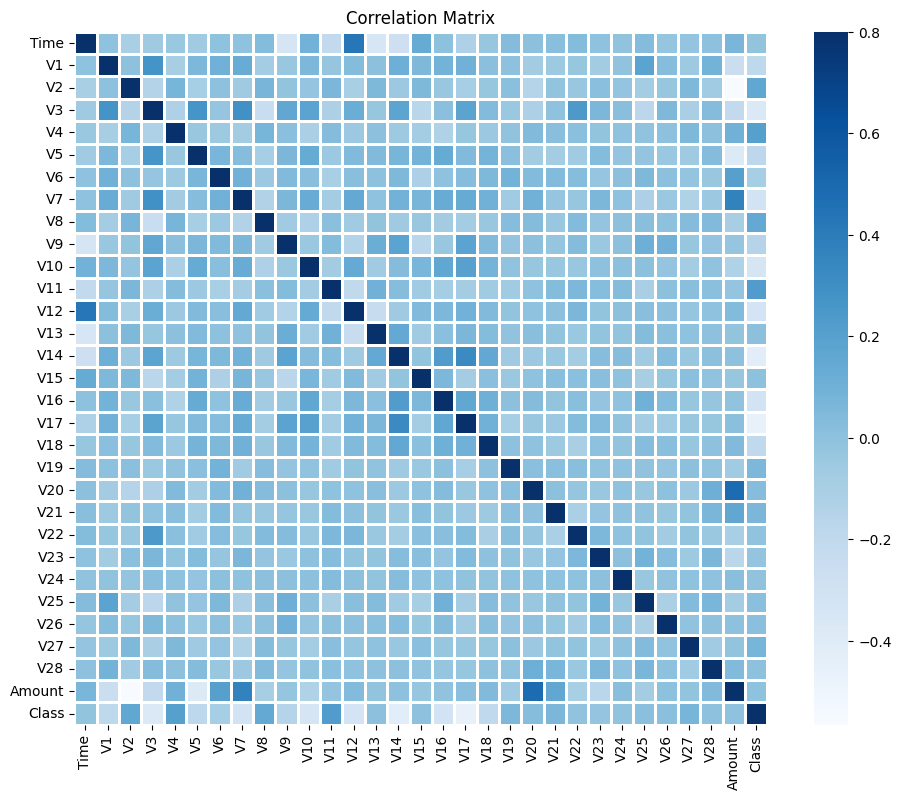

In [27]:
# Calculate the correlation matrix
corrmat = df.corr()

# Create a figure with a specified size
fig = plt.figure(figsize=(12, 9))

# Create a heatmap of the correlation matrix with specified figure size
sns.heatmap(corrmat, vmax=.8, square=True, cmap='Blues',linewidths=0.75, linecolor='white')
plt.title('Correlation Matrix')

# Show the plot
plt.show()

In [28]:
# dividing the X and the Y from the dataset
X = df_imputed.drop(['Class'], axis = 1)
Y = df_imputed["Class"].astype(int)
print(X.shape)
print(Y.shape)

(59511, 30)
(59511,)


In [29]:
# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y

## Train Test and Split

In [30]:
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size = 0.3, random_state = 42, stratify=Y)

In [31]:
from sklearn.impute import SimpleImputer # Import imputer to handle missing values

# Create an imputer to replace missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
xTrain = imputer.fit_transform(xTrain)
xTest = imputer.transform(xTest)

# Handle any potential missing values in train/test sets separately
# Impute missing values in X_train and X_test using the mean
X_train_imputed = imputer.fit_transform(xTrain)
X_test_imputed = imputer.transform(xTest)

# XGBoost

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_model.fit(X_train_scaled, yTrain)

# Make predictions
yPred = xgb_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(yTest, yPred)
report = classification_report(yTest, yPred)

print("XGBoost Model")
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

XGBoost Model
Accuracy: 0.9994959112803854
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17805
           1       0.92      0.90      0.91        49

    accuracy                           1.00     17854
   macro avg       0.96      0.95      0.95     17854
weighted avg       1.00      1.00      1.00     17854



### Confusion Matrix

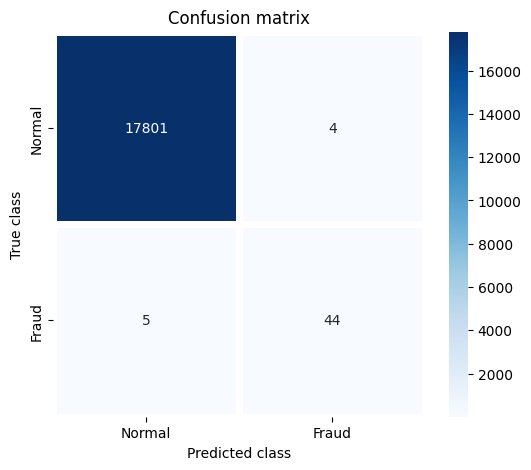

In [33]:
from sklearn.metrics import confusion_matrix # Import confusion matrix

# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d", cmap='Blues', linewidths=5);
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()